### - Судя по данным, предположите, как нарастает ревеню в первый месяц жизни у
### пользователей игры.
### - Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и
 ### третьего дня к 30-му дню?

### Пояснение к таблицe:
Лист ad revenue (данные по рекламному заработку):
- Install_date - дата установки игры пользователем
- Event_date - дата совершения события
- Event_revenue - рекламный заработок
- Platform - платформа
- User_id - уникальный идентификатор пользователя

Лист installs data (данные по количеству инсталлов)
- Install_date - дата
- installs - количество инсталлов
- Platform - платформа

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
df_revenue = pd.read_excel('Ad_revenue.xlsx', sheet_name=0)
df_installs = pd.read_excel('Ad_revenue.xlsx', sheet_name=1)

## EDA

In [5]:
df_revenue.head()

,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [6]:
df_installs.head()

,install_date,installs,platform
0,2023-09-21,1,android
1,2023-09-21,0,android
2,2023-09-21,47,android
3,2023-09-21,0,android
4,2023-09-21,0,android


Посмотрю на размеры датафреймов

In [8]:
revenue = df_revenue.shape[0]
installs = df_installs.shape[0]
print(f'''Размеры датафремов: 
revenue : {revenue}
installs : {installs}''')

Размеры датафремов: 
revenue : 78723
installs : 579


Проверю дубликаты в данных

In [10]:
revenue = df_revenue.duplicated().sum()
installs = df_installs.duplicated().sum()
print(f'''Количество дубликатов в данных: 
revenue : {revenue}
installs : {installs}''')

Количество дубликатов в данных: 
revenue : 1209
installs : 361


Удалю дубликаты

In [12]:
df_revenue = df_revenue.drop_duplicates()
df_installs = df_installs.drop_duplicates()

In [13]:
df_revenue.describe(include='all')

,install_date,event_date,event_revenue,platform,user_id
count,77514,77514,76767.000000,77514,77514
unique,NaN,NaN,NaN,2,8018
top,NaN,NaN,NaN,android,1695439890544-6516855507285663669
freq,NaN,NaN,NaN,71181,130
mean,2023-09-25 02:12:18.447248384,2023-09-26 10:28:00.315813888,0.112389,NaN,NaN
min,2023-09-21 00:00:00,2023-09-21 00:00:00,0.000040,NaN,NaN
25%,2023-09-24 00:00:00,2023-09-25 00:00:00,0.025280,NaN,NaN
50%,2023-09-25 00:00:00,2023-09-27 00:00:00,0.052360,NaN,NaN
75%,2023-09-27 00:00:00,2023-09-28 00:00:00,0.121692,NaN,NaN
max,2023-09-28 00:00:00,2023-09-30 00:00:00,7.911244,NaN,NaN


In [14]:
df_installs.describe(include='all')

,install_date,installs,platform
count,218,218.000000,218
unique,NaN,NaN,2
top,NaN,NaN,android
freq,NaN,NaN,160
mean,2023-09-24 21:14:51.743119360,39.110092,NaN
min,2023-09-21 00:00:00,0.000000,NaN
25%,2023-09-23 00:00:00,3.000000,NaN
50%,2023-09-25 00:00:00,8.500000,NaN
75%,2023-09-27 00:00:00,47.750000,NaN
max,2023-09-28 00:00:00,371.000000,NaN


In [15]:
df_revenue.dtypes

install_date     datetime64[ns]
event_date       datetime64[ns]
event_revenue           float64
platform                 object
user_id                  object
dtype: object

In [16]:
df_installs.dtypes

install_date    datetime64[ns]
installs                 int64
platform                object
dtype: object

Посмотрю, как общая выручка распределена по дням построив график

In [18]:
sum = df_revenue.groupby('event_date', as_index = False)\
    .agg({'event_revenue': 'sum'})

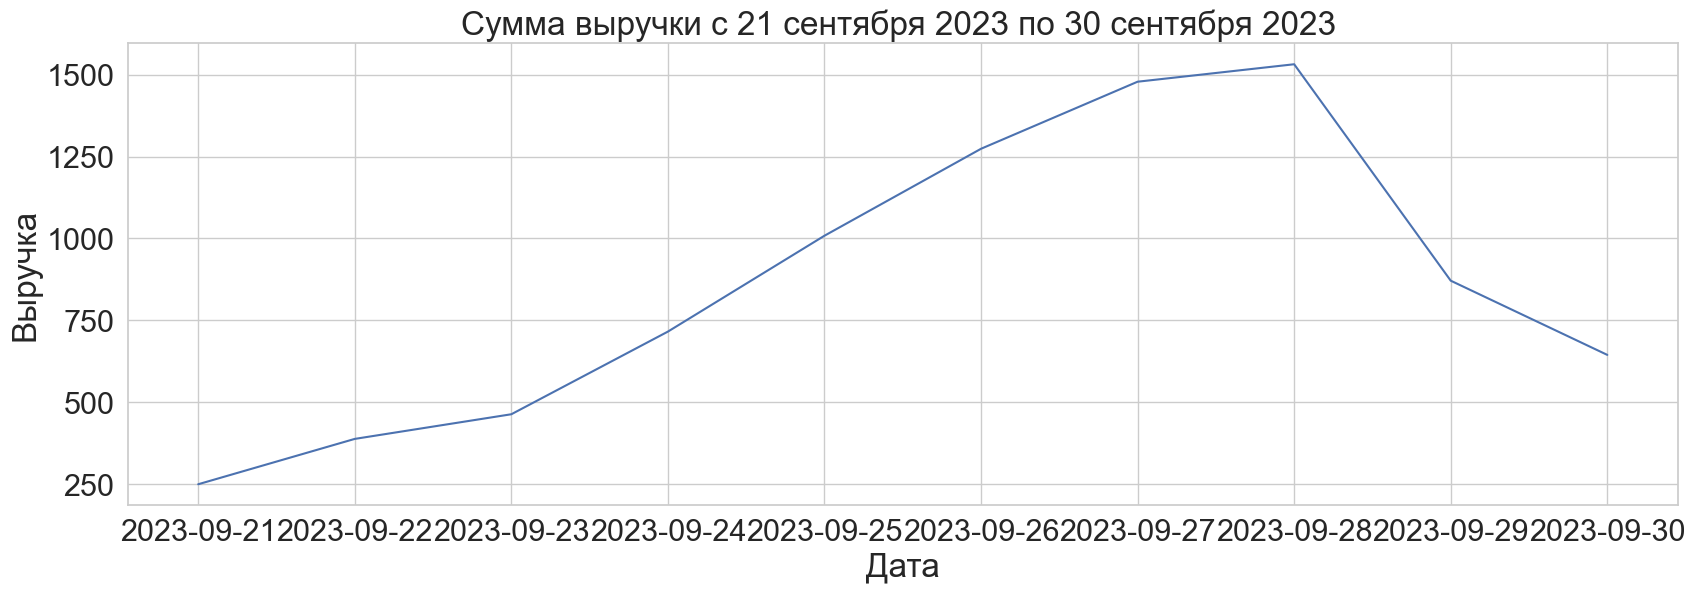

In [19]:
sns.set(
    font_scale =2,
    style = 'whitegrid',
    rc = {'figure.figsize' : (20,6)}
)
sns.lineplot(data = sum, x='event_date', y='event_revenue')
plt.title('Сумма выручки с 21 сентября 2023 по 30 сентября 2023 ')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Text(0, 0.5, 'Частота')

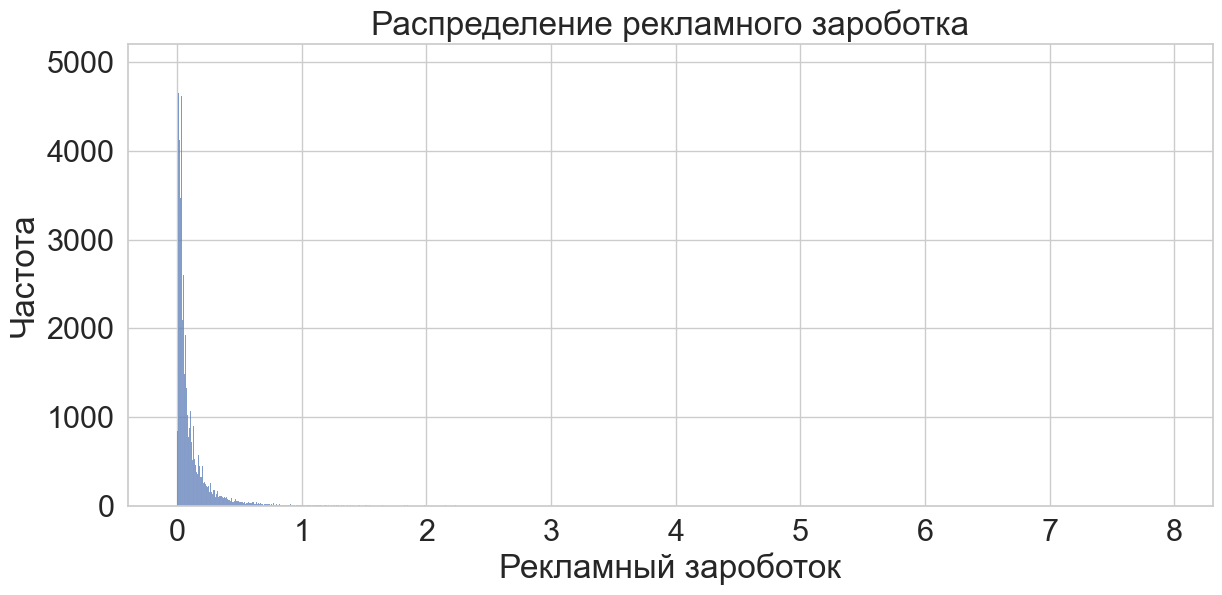

In [20]:
# Построю график распределения рекамного зароботка
plt.figure(figsize=(14, 6))
sns.histplot(df_revenue.event_revenue, kde = False)
plt.title('Распределение рекламного зароботка')
plt.xlabel('Рекламный зароботок')
plt.ylabel('Частота')


Вижу, что в данных есть выбросы, построю еще дополнительные графики

Text(0, 0.5, 'Рекламный зароботок')

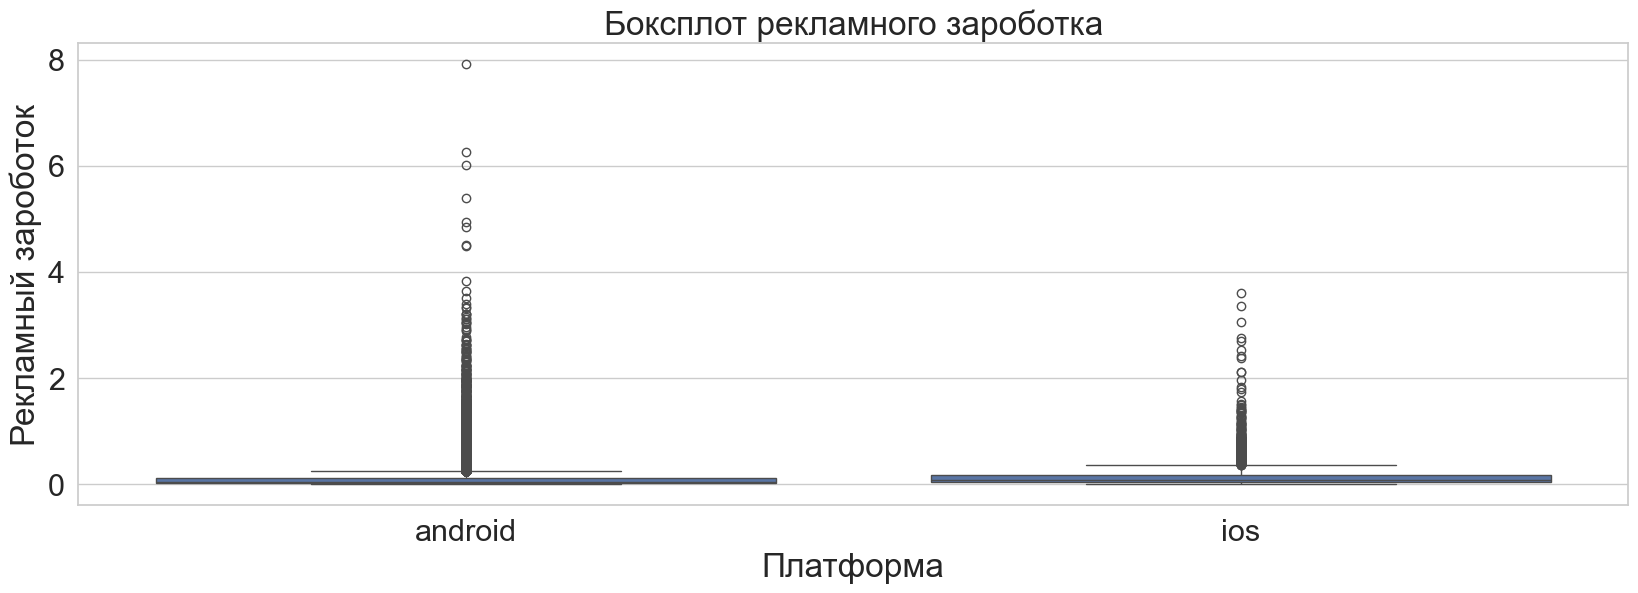

In [22]:
sns.boxplot(x='platform', y = 'event_revenue',data = df_revenue)
plt.title('Боксплот рекламного зароботка')
plt.xlabel('Платформа')
plt.ylabel('Рекламный зароботок')

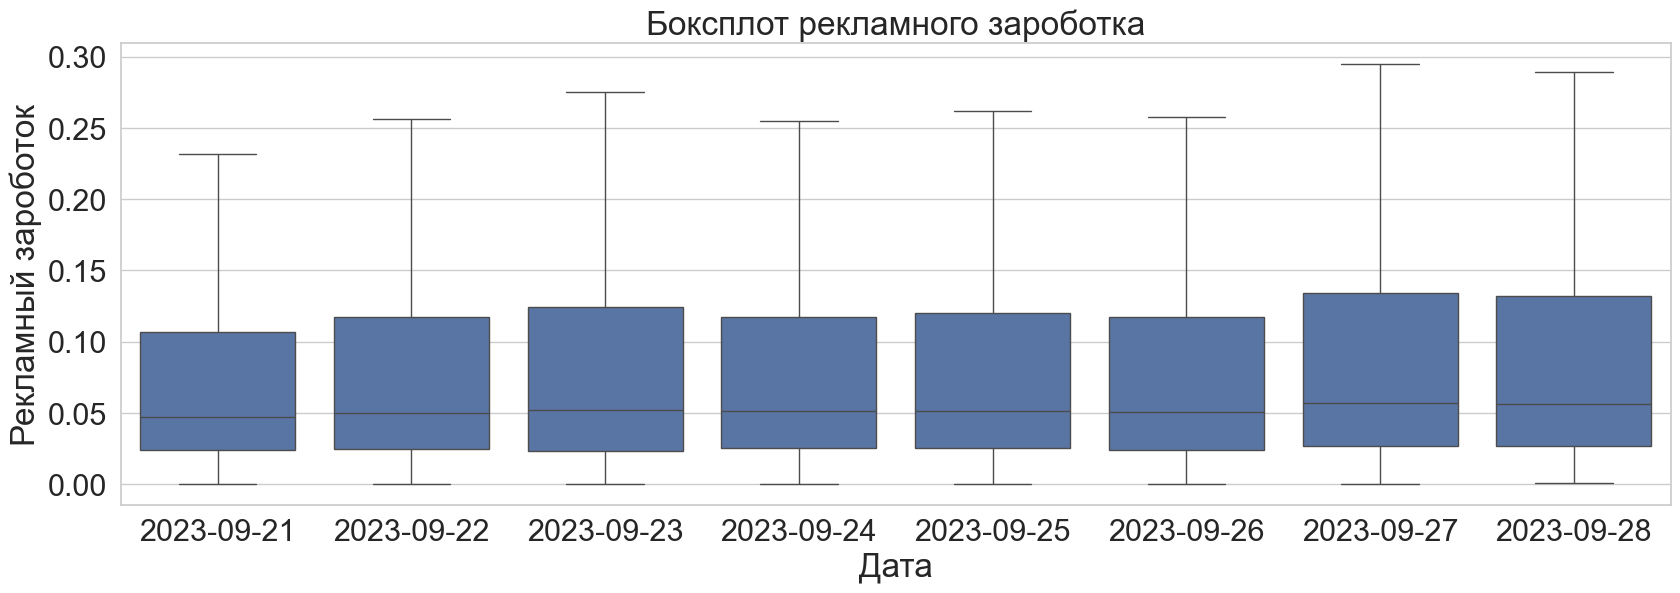

In [23]:
sns.boxplot(x='install_date', y='event_revenue', data=df_revenue, showfliers = False)
plt.title('Боксплот рекламного зароботка')
plt.xlabel('Дата')
plt.ylabel('Рекламный зароботок')
plt.show()

In [24]:
meadian = df_revenue.event_revenue.median()
moda = df_revenue.event_revenue.mode()[0]
mean = df_revenue.event_revenue.mean()
quantile_1 = df_revenue.event_revenue.quantile(0.25)
quantile_3 = df_revenue.event_revenue.quantile(0.75)
print(f''' 
Медиана: {meadian}
Мода: {moda}
Средние значение: {mean}
1-ий квартиль: {quantile_1}
3-ий квартиль: {quantile_3} ''')

 
Медиана: 0.05236
Мода: 0.03629
Средние значение: 0.11238878938866964
1-ий квартиль: 0.02528
3-ий квартиль: 0.121692 


По графикам вижу: 
- 50 %  данных расположено c 0.02528 до 0.121692
- медиана = 0.05236
- межквартильный размах: 𝑄3 - 𝑄1 = 0.121692 − 0.02528 = 0.096412

Определим границы выбросов:

- Нижняя граница: 𝑄1 - 1.5 × 𝐼𝑄𝑅 = 0.02528 − 1.5 × 0.096412 = - 0.119338
- Верхняя граница: Q3 + 1.5 × IQR = 0.121692 + 1.5 × 0.096412 = 0.26631

Т.е значения превыщающие 0.26631 будут считаться выбросами

Необходимо понять, стоит ли убирать выбросы, для этого посомтрю на распределение выбросов, чтобы больше понять их природу. 

Посмотрю на распределение выбросов по дням в разрезе платформ

In [27]:
# Создам отдельный df с выбросами 
emissions = df_revenue.query('event_revenue > 0.26631')\
    .groupby(['event_date','platform'], as_index = False)\
    .agg({'event_revenue':'sum'})

Text(0, 0.5, 'Выбросы')

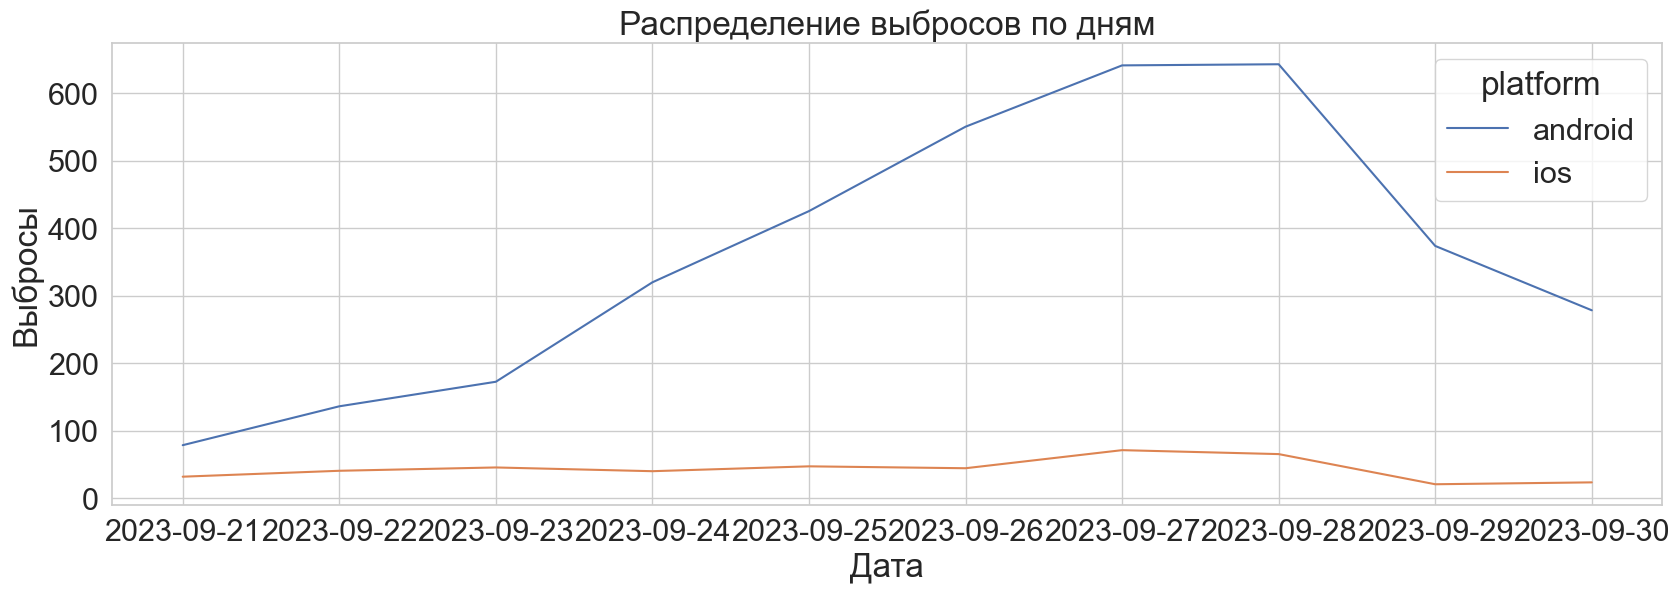

In [28]:
sns.lineplot(x = 'event_date', y = 'event_revenue', data = emissions ,hue = 'platform')
plt.title('Распределение выбросов по дням')
plt.xlabel('Дата')
plt.ylabel('Выбросы')

In [29]:
# Создам отдельный df без выбрасов
no_emissions = df_revenue.query('event_revenue < 0.26631')\
    .groupby(['event_date','platform'], as_index = False)\
    .agg({'event_revenue':'sum'})

Text(0, 0.5, 'Рекламный заработок без выбросов')

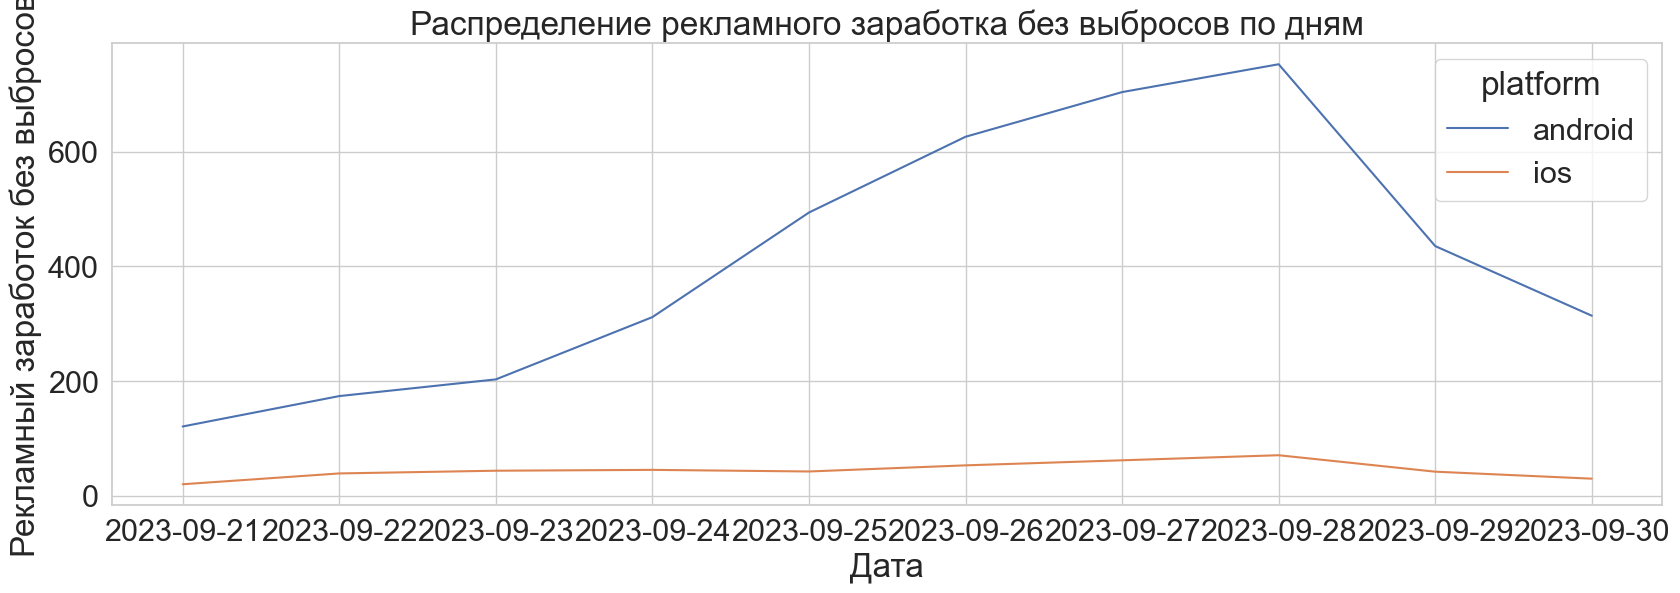

In [30]:
sns.lineplot(x = 'event_date', y = 'event_revenue', data = no_emissions, hue= 'platform')
plt.title('Распределение рекламного заработка без выбросов по дням')
plt.xlabel('Дата')
plt.ylabel('Рекламный заработок без выбросов')

## Как нарастает ревеню в первый месяц жизни у пользователей игры.

In [32]:
# Создам столбец с количетсвом дней с момента установки
df_revenue['days_since_install'] = (df_revenue.event_date - df_revenue.install_date).dt.days

In [33]:
df_revenue.head()

,install_date,event_date,event_revenue,platform,user_id,days_since_install
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966,0
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821,0
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393,0
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393,0
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821,0


In [34]:
# Посчитаю общую сумму дохода по дате установке и по дням использования приложения
revenue_by_day = df_revenue.groupby(['install_date', 'days_since_install'])\
    .agg(total_revenue=('event_revenue', 'sum')).reset_index()

In [35]:
# Отображу общую сумму дохода втабличном виде
revenue_summary = revenue_by_day.pivot(index='install_date', columns='days_since_install', values='total_revenue')
revenue_summary

days_since_install,0,1,2,3,4,5,6,7,8,9
install_date,,,,,,,,,,
2023-09-21,250.690207,90.050838,55.957738,40.644282,33.224541,24.452859,21.983467,15.526360,15.473379,13.517914
2023-09-22,298.912279,102.907600,51.317583,38.088258,40.661297,30.507611,22.090939,20.164325,27.931508,NaN
2023-09-23,305.251365,144.563393,71.718568,57.431749,46.594525,40.390391,38.205923,34.282606,NaN,NaN
2023-09-24,479.590360,176.026499,115.864641,80.173004,68.749947,43.248005,41.922670,NaN,NaN,NaN
2023-09-25,689.403892,280.798198,158.380607,146.781009,92.538496,78.492313,NaN,NaN,NaN,NaN
2023-09-26,754.378128,333.214173,180.165210,164.773894,134.228859,NaN,NaN,NaN,NaN,NaN
2023-09-27,807.189422,330.604241,205.136479,142.328066,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-28,726.973149,291.834933,172.412495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посомтрю, как доход от рекламы (Event_revenue) накапливается по дням

In [37]:
data = df_revenue.groupby(['days_since_install']).agg(total_revenue=('event_revenue', 'sum')).reset_index()
data

,days_since_install,total_revenue
0,0,4312.388802
1,1,1749.999875
2,2,1010.953321
3,3,670.220262
4,4,415.997665
5,5,217.091179
6,6,124.202999
7,7,69.973291
8,8,43.404887
9,9,13.517914


In [38]:
# Добавлю столбец накопленным доходом
data['cumulative_revenue'] = data['total_revenue'].cumsum()
data

,days_since_install,total_revenue,cumulative_revenue
0,0,4312.388802,4312.388802
1,1,1749.999875,6062.388677
2,2,1010.953321,7073.341998
3,3,670.220262,7743.562260
4,4,415.997665,8159.559925
5,5,217.091179,8376.651104
6,6,124.202999,8500.854103
7,7,69.973291,8570.827394
8,8,43.404887,8614.232281
9,9,13.517914,8627.750195


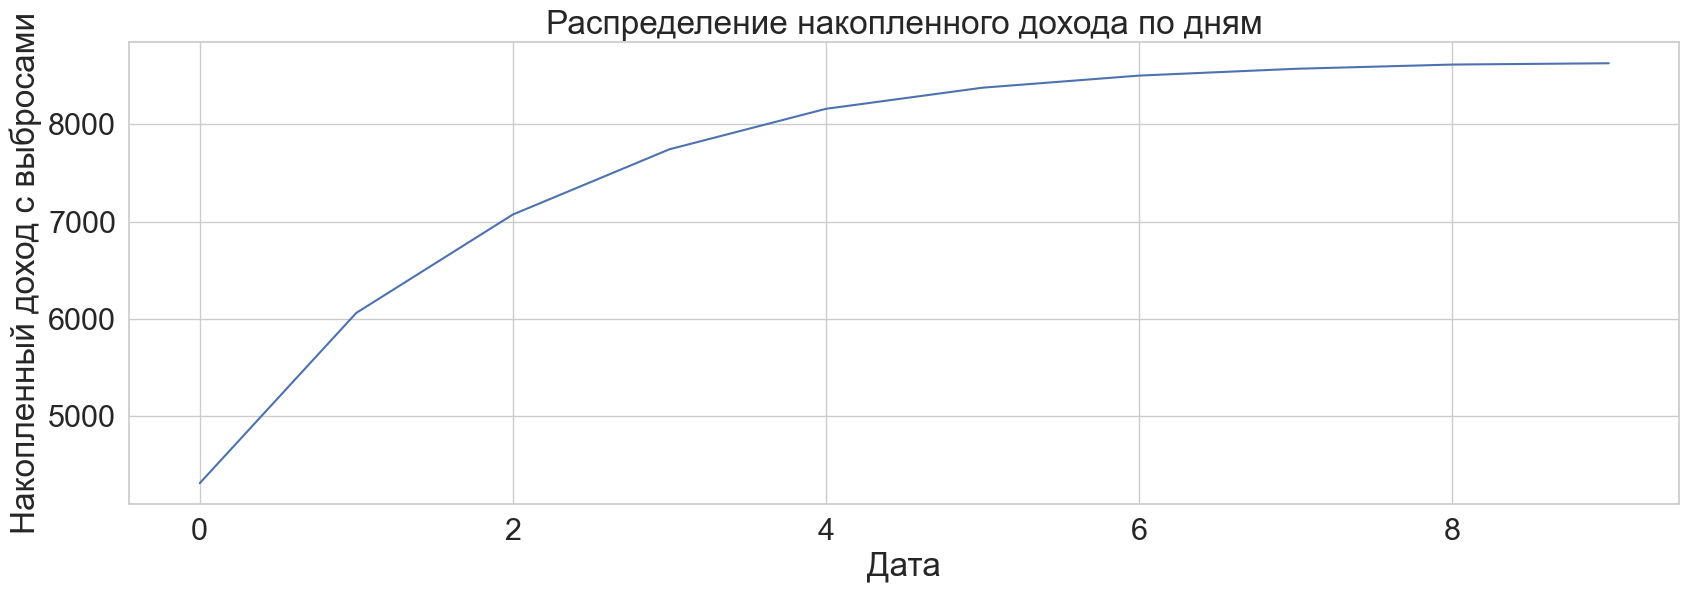

In [39]:
# Построю график по накопленному доходу
sns.lineplot(x = 'days_since_install', y = 'cumulative_revenue', data = data)
plt.title('Распределение накопленного дохода по дням')
plt.xlabel('Дата')
plt.ylabel('Накопленный доход с выбросами')
plt.show()


### ВЫВОД:
Судя по данным и графику, можно предположить, что в первые дни после установки игры доход нарастает довольно быстро, особенно в первые три дня, когда рост дохода заметно выше. 

После этого темп увеличения дохода замедляется, и начиная примерно с 6-го дня, кривая практически стабилизируется. 

Это может говорить о том, что наибольший доход от пользователей игры генерируется в первые несколько дней, после чего прирост дохода уменьшается.
График напоминает логарифмическую модель.

## Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и третьего дня к 30-му дню?

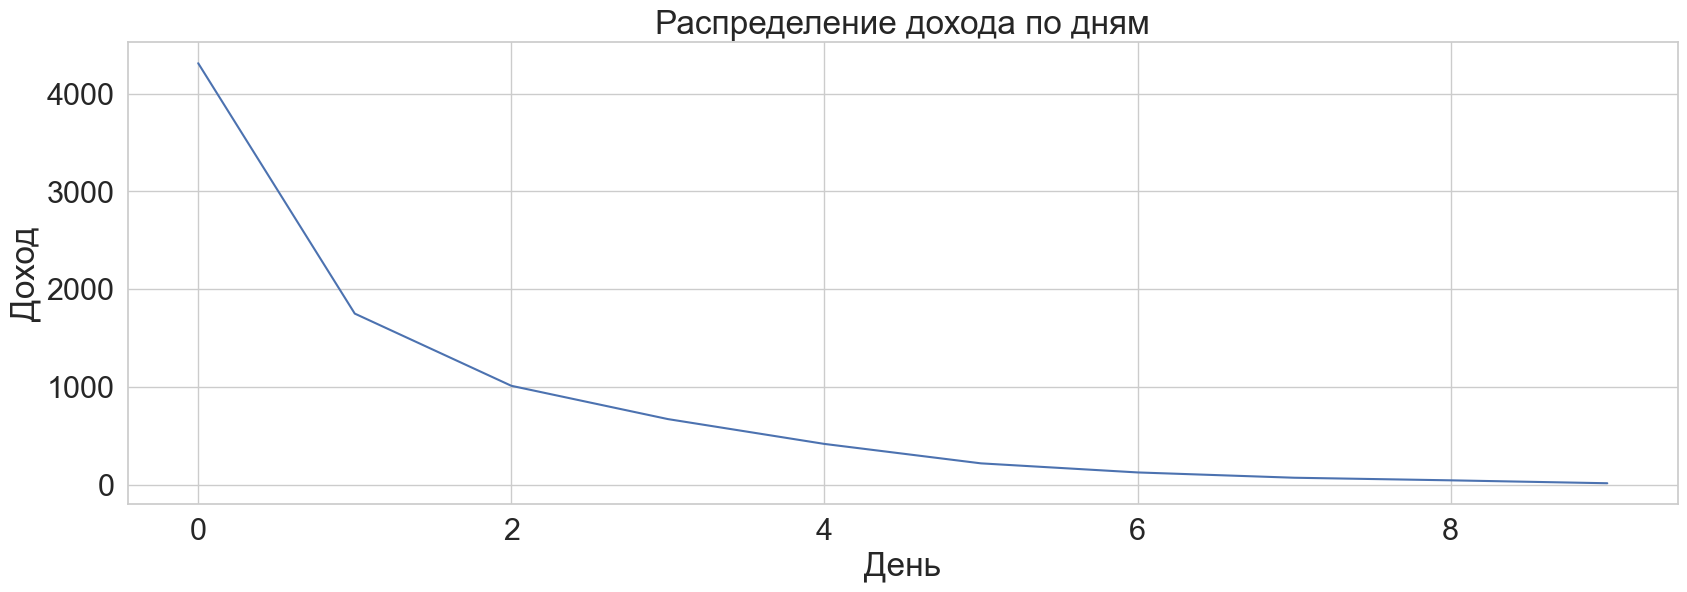

In [42]:
# Построю график, чтобы посомтреть, как увеличивался доход до 9 дня
sns.lineplot(x = 'days_since_install', y = 'total_revenue', data = data)
plt.title('Распределение дохода по дням')
plt.xlabel('День')
plt.ylabel('Доход')

plt.show()

Вижу, что данные распределены экспоненциально, поэтому буду использовать экспоненциальную модель предсказания.

Для модели предсказания, буду использовать данные БЕЗ выбросов. 

In [44]:
# Сохраню данные без выбросов в отдельный df и посчитаю выручку по дням 
without_emissions = df_revenue.query('event_revenue < 0.26631')\
    .groupby(['days_since_install'], as_index = False)\
    .agg(total_revenue=('event_revenue', 'sum'))
without_emissions

,days_since_install,total_revenue
0,0,2264.570228
1,1,896.805334
2,2,543.388500
3,3,358.971784
4,4,234.489126
5,5,135.748933
6,6,72.372485
7,7,41.308510
8,8,21.266805
9,9,9.824786


In [45]:
days = without_emissions['days_since_install']
revenue = without_emissions['total_revenue']

In [46]:
# Определю функцию экспоненциального роста, которая принимает на вход день (day) и два параметра (a, b) для модели экспоненциального роста.
def exponential_growth(day, a, b):
    return a * np.exp(b * day)

In [47]:
# Использую функцию curve_fit для нахождения оптимальных параметров (a, b)для экспоненциальной функции.
# Модель подгоняется под реальные данные (days и revenue).
# maxfev=10000 задает максимальное количество итераций для поиска параметров.
params, _ = curve_fit(exponential_growth, days, revenue, maxfev=10000)

In [48]:
# Генерируется массив с предсказанными днями с 0 по 30 день
predicted_days = np.arange(0, 31)

In [49]:
# Использую параметры, полученные с помощью curve_fit, для расчета предсказанных доходов на каждый день от 0 до 30.
predicted_revenue = exponential_growth(predicted_days, *params)

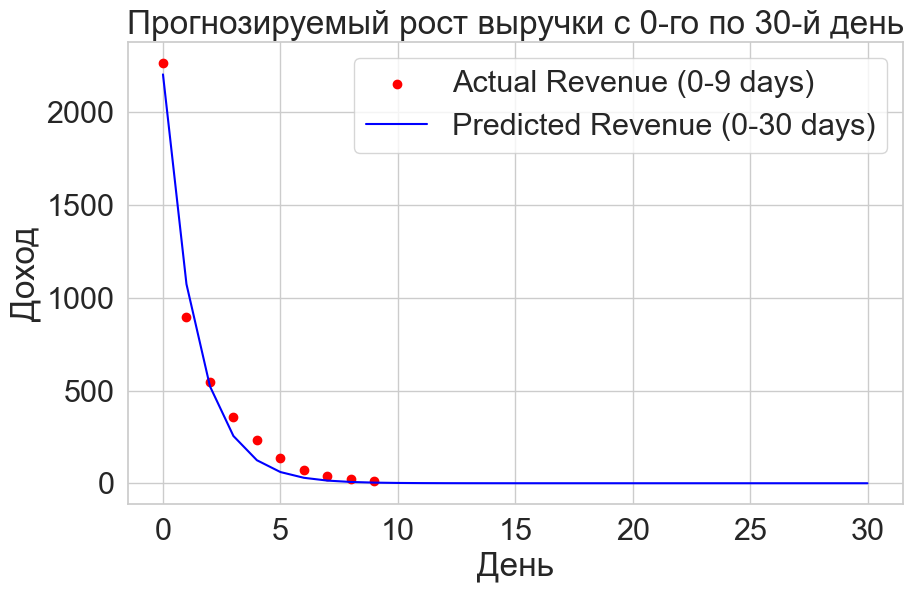

In [50]:
# Создаю график
plt.figure(figsize=(10, 6))
# Построение точечной диаграммы для фактических данных (доход с 0 по 9 день)
plt.scatter(days, revenue, color='red', label='Actual Revenue (0-9 days)')

# Построение линии для предсказанных данных на период с 0 по 30 день
plt.plot(predicted_days, predicted_revenue, label='Predicted Revenue (0-30 days)', color='blue')
plt.xlabel('День')
plt.ylabel('Доход')
plt.title('Прогнозируемый рост выручки с 0-го по 30-й день')
plt.legend()
plt.grid(True) # сетка
plt.show()


In [51]:
day_30_pred = predicted_revenue[30]
print (f''' Предсказанный доход за 30 день: {day_30_pred} ''')

 Предсказанный доход за 30 день: 9.347055844081926e-07 


In [52]:
data

,days_since_install,total_revenue,cumulative_revenue
0,0,4312.388802,4312.388802
1,1,1749.999875,6062.388677
2,2,1010.953321,7073.341998
3,3,670.220262,7743.562260
4,4,415.997665,8159.559925
5,5,217.091179,8376.651104
6,6,124.202999,8500.854103
7,7,69.973291,8570.827394
8,8,43.404887,8614.232281
9,9,13.517914,8627.750195


In [53]:
# Отношение фактической выручки к прогнозируемой выручке за определенный день 
day_0_to_30 =  data.loc[data['days_since_install']== 0,'total_revenue'].iloc[0] / day_30_pred
day_1_to_30 = data.loc[data['days_since_install']== 1,'total_revenue'].iloc[0] / day_30_pred
day_3_to_30 = data.loc[data['days_since_install']== 3,'total_revenue'].iloc[0] / day_30_pred
print("Доход за 0 день больше в:", day_0_to_30, "по отношению к 30-му дню ")
print("Доход за первый день больше в:", day_1_to_30, "по отношению к 30-му дню ")
print("Доход за третий день больше в:", day_3_to_30,  "по отношению к 30-му дню ")

Доход за 0 день больше в: 4613633291.525034 по отношению к 30-му дню 
Доход за первый день больше в: 1872247159.0966363 по отношению к 30-му дню 
Доход за третий день больше в: 717038897.7876375 по отношению к 30-му дню 


# Задание 2
### Как вы думаете, какие проекты являются основными конкурентами?
### https://play.google.com/store/apps/details?id=com.matryoshka.cityrescueteam
### Почему?

Для определения конкуретных проектов, буду обращать внимание на ряд информации:
1. Жанр игры
2. Количество скачиваний 
3. Рейтинг игры

Но так же может возникнуть ситуации, что скачиваний еще не так много потому что игра только вышла, но уже достаточно быстро растет популярность среди пользовталей.
Поэтому так же важно смотреть на динамику скачиваний игры

Проведу первичный анализ, по поиску основных конкуретов на платформе Android и iOS

In [56]:
import pandas as pd
import itunespy
from google_play_scraper import app, search

Напишу две функции, которые будут возвращать информацию о приложениях по ключевому слову для GooglePlay и AppStore.


In [58]:
def get_game_GooglePlay (name_game, n_hits):
    '''
Функция выполняет поиск и сбор информации об играх в Google Play на основе заданного названия игры и количества результатов.

Параметры:
- name_game (str): Название игры или ключевые слова для поиска.
- n_hits (int): Количество результатов, которые нужно получить.

Возвращает:
- df_GooglePlay: DataFrame, содержащий информацию о найденных играх, включая идентификатор, название, компанию, количество установок, рейтинг, жанр и другие параметры.
'''

    all_data = []
    results = search(name_game, n_hits)  # Ищем первые результы по ключевому слову name_game

    # Для каждой найденной игры получаем детальную информацию
    for result in results:
        app_id = result['appId']  # Получаем уникальный идентификатор приложения с помощью уникального идентификатора
        
        # Получаем информацию о приложении
        details = app(app_id)
        
        # Извлекаем необходимые поля
        data = {
            'id': details.get('appId', 'N/A'), # Уникальный идентификатор приложения
            'name': details.get('title', 'N/A'), # Название игры
            'company': details.get('developer', 'N/A'),  # Разработчик игры
            'installs': details.get('installs', 'N/A'), # Количество установок
            'platform': "Android",  # Платформа фиксированная
            'reviews': details.get('ratings', 'N/A'), # Количество отзывов
            'genres': details.get('genre', 'N/A'), # Жанр игры
            'age': details.get('contentRating', 'N/A'), # Возрастной рейтинг
            'price': details.get('price', 'N/A'), # Цена игры
            'release' : details.get('release_date', 'N/A'), # Дата релиза игры
            'score' : details.get('score', 'N/A') # Рейтинг игры
        }
    
        # Добавляем данные об игре в список
        all_data.append(data)
    
    # Создаем DataFrame из списка
    df_GooglePlay = pd.DataFrame(all_data)
    return df_GooglePlay

In [59]:
def get_game_AppStore(name, limit,country, media):
    '''
Функция выполняет поиск и сбор информации об играх в App Store на основе заданного названия, страны, типа медиа и количества результатов.

Параметры:
- name (str): Название игры или ключевые слова для поиска.
- limit (int): Максимальное количество результатов, которые нужно получить.
- country (str): Код страны (например, 'us' для США), в которой выполняется поиск.
- media (str): Тип медиа для поиска (например, 'software' для приложений).

Возвращает:
- df_AppStor (DataFrame): DataFrame, содержащий информацию о найденных играх, включая идентификатор, название, разработчика, платформу, количество отзывов, жанр, возрастной рейтинг, цену, дату релиза и оценку игры. Данные о количестве установок отсутствуют, так как App Store не предоставляет эту информацию.
'''

# Создаем пустой список для хранения данных
    all_data = []
    results = itunespy.search(name, country=country, media=media, limit=limit)
    # Извлекаем данные по каждой найденной игре
    for result in results:
        all_data.append({
                'id': result.track_id, # Уникальный идентификатор приложения
                'name': result.track_name, # Название игры
                'company': result.seller_name, # Разработчик игры
                'installs': 'N/A',  # App Store не предоставляет данные об установках
                'platform': 'iOS',  # Платформа фиксированная
                'reviews': result.user_rating_count, # Количество отзывов
                'genres': ', '.join(result.genres) if result.genres else 'N/A', # Жанр игры
                'age': result.content_advisory_rating, # Возрастной рейтинг
                'release': result.release_date, # Дата релиза игры
                'price': result.formatted_price,  # Цена игры
                'score': result.average_user_rating # Рейтинг игры
            })
    # Преобразуем данные в DataFrame для анализа
    df_AppStor = pd.DataFrame(all_data)
    return df_AppStor

Нашла рекомендованные игры по предложению Google Play и App Store и буду использовать их для получения информации о похожих игр. 

In [61]:
df_1_GooglePlay = get_game_GooglePlay("Rescue Dash", 10)
df_2_GooglePlay = get_game_GooglePlay("Family Hospital", 10)
df_3_GooglePlay = get_game_GooglePlay("Heart's Medicine", 10)
df_4_GooglePlay = get_game_GooglePlay("Delicious ", 10)
df_5_GooglePlay = get_game_GooglePlay("Heart's Medicine ", 10)
df_6_GooglePlay = get_game_GooglePlay("Больничное безумие", 10)
df_7_GooglePlay = get_game_GooglePlay("готовка команда Ресторан Игра", 10)
df_8_GooglePlay = get_game_GooglePlay("Heart's Medicine Hospital Heat", 10)
df_9_GooglePlay = get_game_GooglePlay("Delicious", 10)
df_10_GooglePlay = get_game_GooglePlay("Delicious", 10)

In [62]:
df_1_AppStore = get_game_AppStore("Rescue Dash", 10, 'us' , 'software')
df_2_AppStore = get_game_AppStore("Clinic Mania", 10,'us', 'software') 
df_3_AppStore = get_game_AppStore("Happy Doctor", 10, 'us','software')
df_4_AppStore = get_game_AppStore("Spring Valley", 10,'us', 'software')
df_5_AppStore = get_game_AppStore("Magicabin", 10,'us', 'software')
df_6_AppStore = get_game_AppStore("Chef & Friends", 10, 'us', 'software')
df_7_AppStore = get_game_AppStore("Grand Hotel Mania", 10,'us','software')
df_8_AppStore = get_game_AppStore("Cooking Fun", 10, 'us','software')
df_9_AppStore = get_game_AppStore("Cooking Journey", 10, 'us','software')
df_10_AppStore = get_game_AppStore("Sarah's Adventure", 10,'us', 'software')

In [63]:
# Объединение df из Google Play
df_google_play = pd.concat([
    df_1_GooglePlay, df_2_GooglePlay, df_3_GooglePlay, df_4_GooglePlay,
    df_5_GooglePlay, df_6_GooglePlay, df_7_GooglePlay, df_8_GooglePlay,
    df_9_GooglePlay, df_10_GooglePlay
], ignore_index=True)

# Объединение df из App Store
df_app_store = pd.concat([
    df_1_AppStore, df_2_AppStore, df_3_AppStore, df_4_AppStore,
    df_5_AppStore, df_6_AppStore, df_7_AppStore, df_8_AppStore,
    df_9_AppStore, df_10_AppStore
], ignore_index=True)

# Объединение всех df в один
df = pd.concat([df_google_play, df_app_store], ignore_index=True)

## Подготовим данные для анализа

In [65]:
# Удалим дубликаты
df = df.drop_duplicates()

In [66]:
df.dtypes

id           object
name         object
company      object
installs     object
platform     object
reviews     float64
genres       object
age          object
price        object
release      object
score       float64
dtype: object

In [67]:
# Переведу в тип "дата" поле release
df['release'] = df['release'].replace('N/A', pd.NaT)
df['release'] = pd.to_datetime(df.release)

In [68]:
# Переведу в тип "инт" поле installs
# Для этого уберу знак "+" и знак "," 
df['installs'] = df['installs'].replace(r'\+$','', regex=True)
df['installs'] = df['installs'].replace(r'\,','', regex=True)
df['installs'] = df['installs'].replace('N/A', pd.NA)
df['installs'] = df['installs'].astype('Int64')

## Анализ данных 

Для платформы Android конкурентными проектами я буду считать проекты с большим количеством скачиваний и высоким рейтингом.

Выведу 10 самых конкуретных проектов на Android

In [71]:
df.query('platform == "Android" & score >4').sort_values(['installs', 'score'], ascending = [False, False]).head(10)

,id,name,company,installs,platform,reviews,genres,age,price,release,score
54,com.biglime.cookingmadness,Cooking Madness: A Chef's Game,ZenLife Games Ltd,100000000,Android,3116849.0,Arcade,Everyone,0,NaT,4.799848
64,com.nordcurrent.canteenhd,Cooking Fever: Restaurant Game,Nordcurrent Games,100000000,Android,4986418.0,Arcade,Everyone,0,NaT,4.386983
65,com.my.cooking.chef.kitchen.craze.fever,My Cooking: Restaurant Game,gameone,50000000,Android,327094.0,Arcade,Everyone,0,NaT,4.716240
63,com.cookingcity.chef.kitchen.craze.fever,Cooking City: Restaurant Games,MAGIC SEVEN,50000000,Android,583519.0,Arcade,Everyone,0,NaT,4.678349
18,com.playflock.family.hotel.story.home.mansion....,Family Hotel: love & match-3,PlayFlock,50000000,Android,359903.0,Puzzle,Teen,0,NaT,4.653122
78,com.viki.android,Viki: Asian Dramas & Movies,"Viki, Inc",50000000,Android,1019312.0,Entertainment,Teen,0,NaT,4.633142
16,com.playtoddlers.centralhospitalstories.free,Central Hospital Stories,SUBARA,50000000,Android,122894.0,Educational,Everyone,0,NaT,4.366147
67,com.trmx.cookingragerestaurant,Cooking Rage - Restaurant Game,Tremex Games,10000000,Android,33753.0,Arcade,Everyone,0,NaT,4.747663
60,com.matryoshka.royal.cooking.kitchen.madness,Royal Cooking - Cooking games,Matryoshka,10000000,Android,196335.0,Arcade,Everyone,0,NaT,4.670484
36,com.gamehouse.deliciousdinercooking,Delicious World - Cooking Game,GameHouse Original Stories,10000000,Android,193615.0,Simulation,Everyone,0,NaT,4.634026


К сожалению, для iOS нет данных по количеству скачиваний, поэтому для анализа я буду использовать рейтинг и количество отзывов. 

Я понимаю, что количество отзывов является лишь косвенным показателем конкурентоспособности, так как отзывы могут быть все отрицательные, но для первичного анализа рассмотрю и этот параметр.

Выведу 10 самых конкуретных проектов на iOS

In [73]:
df.query('platform == "iOS" & score >4').sort_values(['score', 'reviews'], ascending = [False, False]).head(10)

,id,name,company,installs,platform,reviews,genres,age,price,release,score
150,1586951898,Chef & Friends: Cooking Game,MYTONA Ltd.,<NA>,iOS,8416.0,"Games, Casual, Simulation",12+,Free,2023-07-05 07:00:00+00:00,4.93619
171,6464368664,Cooking Fun: Food Games,Palmax Limited,<NA>,iOS,13126.0,"Games, Strategy, Casual",4+,Free,2023-09-09 07:00:00+00:00,4.91627
139,1585193132,Fiona’s Farm,ACE ACADEMY TEKNOLOJI ANONIM SIRKETI,<NA>,iOS,34084.0,"Games, Puzzle, Adventure",4+,Free,2022-08-31 07:00:00+00:00,4.90116
140,1584609622,Magicabin,IVYMOBILE INTERNATIONAL ENTERPRISE LIMITED,<NA>,iOS,10859.0,"Games, Puzzle, Casual",4+,Free,2022-03-25 07:00:00+00:00,4.89677
180,1617229878,Cooking Journey: Food Games,Palmax Limited,<NA>,iOS,10033.0,"Games, Casual, Strategy",12+,Free,2022-04-13 07:00:00+00:00,4.88976
158,6443895159,Cat Snack Bar: Food Games,treeplla Inc.,<NA>,iOS,101525.0,"Games, Simulation, Casual",4+,Free,2023-01-10 08:00:00+00:00,4.86817
152,1323901884,Cooking Madness-Kitchen Frenzy,ZenLife Games Pte. Ltd.,<NA>,iOS,693013.0,"Games, Casual, Strategy",9+,Free,2017-12-13 01:49:35+00:00,4.85332
176,1323901884,Cooking Madness-Kitchen Frenzy,ZenLife Games Pte. Ltd.,<NA>,iOS,692928.0,"Games, Casual, Strategy",9+,Free,2017-12-13 01:49:35+00:00,4.85332
182,1323901884,Cooking Madness-Kitchen Frenzy,ZenLife Games Pte. Ltd.,<NA>,iOS,692760.0,"Games, Casual, Strategy",9+,Free,2017-12-13 01:49:35+00:00,4.85329
130,1509432873,Spring Valley: Farming Games,Playkot Ltd,<NA>,iOS,20779.0,"Games, Casual, Adventure",4+,Free,2022-04-26 07:00:00+00:00,4.84600


# Задание 3

В качестве эксперимента протестировали два разных варианта баланса уровней (A/B). Через месяц получили следующие результаты:

| Cohort | Size (people) | Paying Share (%) | ARPU ($) | Retention D30 (%) |
|--------|---------------|------------------|----------|-------------------|
| 0      | A             | 500              | 10       | 1.0      | 5                 |
| 1      | B             | 500              | 14       | 0.8      | 4                 |

Как вы считаете, когорта с каким балансом перспективнее? Почему?


In [75]:
data = {
    'Cohort':[ 'A','B'],
    'Size(people)' : [500, 500],
    'Paying Share (%)' : [10, 14],
    'ARPU ($)' : [1, 0.8],
    'Retention D30 (%)' : [5, 4]}

In [76]:
df = pd.DataFrame(data)
df

,Cohort,Size(people),Paying Share (%),ARPU ($),Retention D30 (%)
0,A,500,10,1.0,5
1,B,500,14,0.8,4


Рассчитаю для платформы Android (так как у меня есть данные по количесвту скачиваний только из Google Play)
Android Size = 1 млн

### 1. Рассчитаю количество платящих пользователей через 30 дней

#### Когорта А: 
Количество платящих пользователей (Paing Size) = Paying Share * Retention * Android Size = 0.1 * 0.05 * 1000000 = 5000 

#### Когорта B: 
Количество платящих пользователей (Paing Size) = Paying Share * Retention * Android Size = 0.14 * 0.04 * 1000000 = 5600

### 2. Рассчитаю доход за первый месяц:
#### Когорта А:
Доход = Paing Size * ARPU = 5000 * 1 = 5000 долларов

#### Когорта B:
Доход = Paing Size * ARPU = 5600 * 0.8 = 4480 долларов

### 3. Рассчитаю доход за 3 месяца ( с учетом, что Retention не изменится):
#### Когорта А:
Доход = 3 * 5000 = 15000 долларов

#### Когорта B:
Доход = 3 * 4480 = 13440 долларов


Как видно из результатов, когорта А приносит больше дохода. 
